## PVLIB

In [1]:
import pvlib
from pvlib.location import Location
import pandas as pd

import matplotlib.pyplot as plt

## pylib generated over the period of the '2022_15_data.csv'

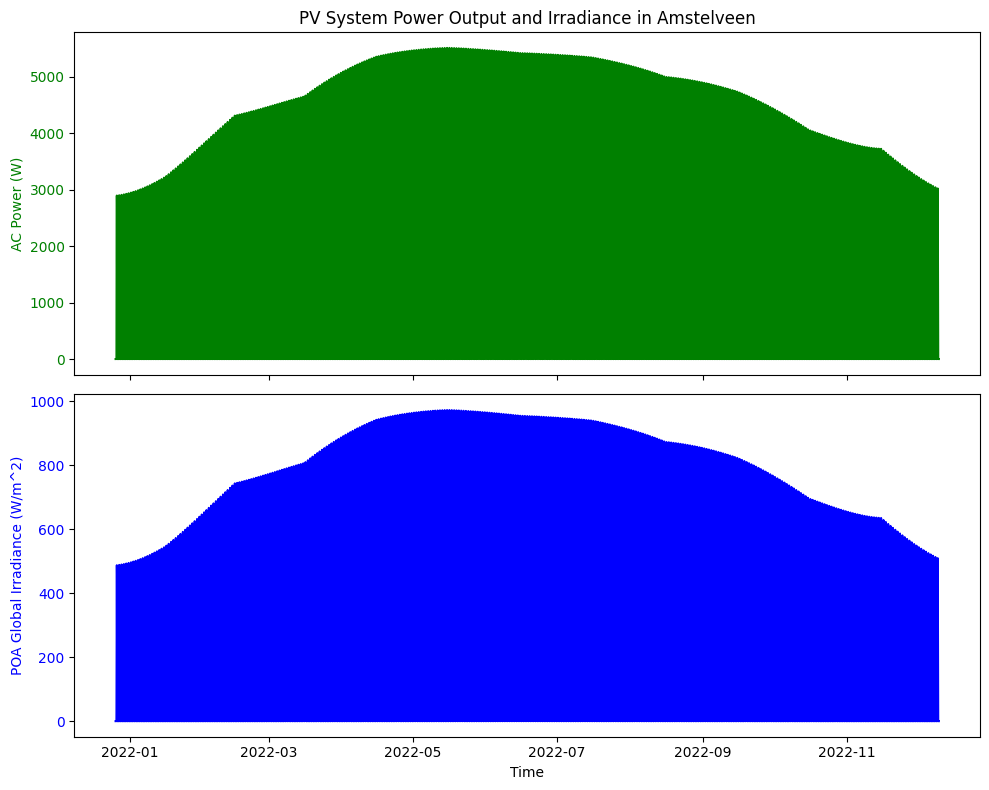

In [2]:
latitude, longitude, tz = 52.3114, 4.8701, 'Europe/Amsterdam'
location = Location(latitude, longitude, tz)

# Get solar position with 15-minute intervals
times = pd.date_range(start='2021-12-26', end='2022-12-10', freq='15min', tz=tz)
solar_position = location.get_solarposition(times)

# Get clear sky data
clearsky = location.get_clearsky(times)

# Define the surface tilt and azimuth
surface_tilt = 30  # degrees
surface_azimuth = 180  # degrees (facing south)

# Get irradiance data
total_irrad = pvlib.irradiance.get_total_irradiance(
    surface_tilt=surface_tilt,
    surface_azimuth=surface_azimuth,
    dni=clearsky['dni'],
    ghi=clearsky['ghi'],
    dhi=clearsky['dhi'],
    solar_zenith=solar_position['apparent_zenith'],
    solar_azimuth=solar_position['azimuth']
)

# Temperature and other parameters
temperature = pvlib.temperature.faiman(
    poa_global=total_irrad['poa_global'],
    temp_air=0,  # ambient temperature
    wind_speed=1,  # wind speed
    u0=25,  # default value for u0 in Faiman model
    u1=6.84  # default value for u1 in Faiman model
)

# PV system configuration using PVWatts model parameters
pdc0 = 6000  # DC capacity of the system in W
gamma_pdc = -0.003  # temperature coefficient of power in 1/C
inv_eff = 0.96  # inverter efficiency

# Calculate DC power using PVWatts model
dc_power = pvlib.pvsystem.pvwatts_dc(
    g_poa_effective=total_irrad['poa_global'],
    temp_cell=temperature,
    pdc0=pdc0,
    gamma_pdc=gamma_pdc
)

# Calculate AC power using PVWatts inverter model
ac_power = pvlib.inverter.pvwatts(dc_power, pdc0=pdc0, eta_inv_nom=inv_eff)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

ax1.plot(ac_power.index, ac_power, 'g-')
ax1.set_ylabel('AC Power (W)', color='g')
ax1.tick_params(axis='y', labelcolor='g')

ax2.plot(total_irrad.index, total_irrad['poa_global'], 'b-')
ax2.set_ylabel('POA Global Irradiance (W/m^2)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax1.set_title('PV System Power Output and Irradiance in Amstelveen')
ax2.set_xlabel('Time')

plt.tight_layout()
plt.show()

AC Vermogen verwijst naar het elektrische vermogen dat door het PV-systeem wordt gegenereerd na omzetting van gelijkstroom (DC) naar wisselstroom (AC) met behulp van een omvormer. Dit is de daadwerkelijk bruikbare elektrische energie die het PV-systeem levert aan het elektriciteitsnet of aan de elektrische belastingen die erop zijn aangesloten.

POA (Plane of Array) Globale Irradiantie verwijst naar de totale hoeveelheid zonnestraling (zonlichtintensiteit) die het oppervlak van de PV-modules bereikt, nadat rekening is gehouden met de invalshoek en eventuele schaduweffecten. Het is een maat voor de totale zonne-energie die beschikbaar is voor omzetting in elektriciteit door de PV-modules.

### Relatie:
- AC Vermogen is het eindresultaat van de werking van het PV-systeem en vertegenwoordigt de daadwerkelijke elektrische energie die beschikbaar is voor gebruik of export.
- POA Globale Irradiantie is de zonne-energie-invoer naar de PV-modules en bepaalt hoeveel energie potentieel kan worden omgezet in elektriciteit.

Samenvattend, AC Vermogen toont de daadwerkelijke elektrische output van het PV-systeem, terwijl POA Globale Irradiantie de zonne-energie invoer toont die beschikbaar is voor omzetting in elektriciteit door de PV-modules. Beide zijn cruciale metingen voor het begrijpen van de prestaties en efficiëntie van een PV-systeem.

## Save to csv

Latitude, Longitude, and Timezone (latitude, longitude, tz):

- Latitude and Longitude: These are geographical coordinates that specify the location on Earth where the solar PV system is located. Latitude (52.3114°) and Longitude (4.8701°) pinpoint Amstelveen, Netherlands, in this case.
- Timezone (tz): Specifies the timezone of the location, which is 'Europe/Amsterdam' for Amstelveen. This is crucial for accurate timekeeping and solar position calculations.

Timestamps (times):

- These are datetime values representing the time span over which the simulation is conducted, in 15-minute intervals, starting from '2021-12-26' to '2022-12-10' and converted to the specified timezone ('Europe/Amsterdam').

Solar Position (solar_position): Provides information about the position of the sun relative to the location (latitude, longitude, and timezone) at each timestamp.

- Solar Zenith: The angle between the vertical and the line to the sun, measured from directly overhead (zenith). Lower values indicate the sun is closer to directly overhead.
- Solar Azimuth: The compass direction from the observer (in this case, facing south) to the sun's position in the sky.

Clear Sky Data (clearsky): Provides estimates of solar radiation under clear sky conditions at each timestamp.

- Direct Normal Irradiance (DNI): The amount of solar radiation received per unit area by a surface that is always held perpendicular (normal) to the rays that come in a straight line from the direction of the sun at its current position in the sky.
- Global Horizontal Irradiance (GHI): The total amount of shortwave radiation received from above by a horizontal surface.
- Diffuse Horizontal Irradiance (DHI): The amount of radiation received from the sky (excluding the sun) on a horizontal surface.

Irradiance Data (total_irrad): Calculated total irradiance incident on the solar panel, considering the orientation of the panel and the sun's position.

- POA Global (Plane of Array Global Irradiance): The total amount of irradiance incident on a surface that is tilted and oriented based on the given surface_tilt and surface_azimuth.

Temperature (temperature):

- Calculated temperature of the solar cell based on ambient temperature (temp_air), wind speed (wind_speed), and empirical coefficients (u0 and u1 in the Faiman model). This temperature affects the efficiency and output of the PV cells.

PV System Configuration Parameters:

- DC Capacity (pdc0): The rated DC capacity of the PV system in watts.
- Temperature Coefficient of Power (gamma_pdc): Represents how much the power output of the PV system decreases with increasing temperature.
- Inverter Efficiency (inv_eff): Efficiency of the inverter, which converts DC power generated by the PV panels into AC power usable by electrical devices.

Power Output (dc_power and ac_power):

- DC Power (dc_power): Power output from the PV panels in DC form, considering irradiance, temperature, and PV module characteristics.
- AC Power (ac_power): Power output after conversion to AC by the inverter, which accounts for losses and efficiency considerations.

In [3]:
data = pd.DataFrame({
    'Timestamp': times,
    'Solar Zenith (degrees)': solar_position['apparent_zenith'],
    'Solar Azimuth (degrees)': solar_position['azimuth'],
    'DNI (W/m^2)': clearsky['dni'],
    'GHI (W/m^2)': clearsky['ghi'],
    'DHI (W/m^2)': clearsky['dhi'],
    'POA Global (W/m^2)': total_irrad['poa_global'],
    'Temperature (C)': temperature,
    'DC Power (W)': dc_power,
    'AC Power (W)': ac_power
})

data.set_index('Timestamp', inplace=True)
data.to_csv('core\static\data\solar_simulation_data.csv')